# Support Vector Machines and Random Forest 

In [1]:
# Today we use the support vector machine and the random forest classifier to make predictions for some data
# This practical only contains a tiny amount of lines of code provided by you.
# We will use sklearn library to make everything work.
# Go through every notebook cell and implement the code on the areas where code is missing.
# Data generation and plotting is already provided as methods below.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
def create_dataset1():
    X,y = make_blobs(n_samples = 90, centers = 2, random_state = 3)
    return X, y

In [4]:
def create_dataset2():
    # Create dataset
    np.random.seed(42)  # always the same data generation
    X = np.stack((np.random.normal(size=100),np.random.normal(size=100)),axis = 1)
    y = np.array([1 if (xy[0]**2+xy[1]**2)**0.5 <0.5 else 0 for xy in X])
    
    return X, y

In [5]:
def plot_dataset(X, y):
    # plot data
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker = '*', s=30)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker = 'v', s=30)
    plt.show()

## 1) Support Vector Machines

In [6]:
def plot_svm_vectors(clf):
    plt.figure(figsize=(10,10))

    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker = '*', s=30)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker = 'v', s=30)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(
        XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
    )
    # plot support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors='none',
        edgecolors="k",
    )
    plt.title("Distance to hyperplane and support vectors")
    plt.ylabel('Feature y')
    plt.xlabel('Feature x')
    plt.show()

### 1.1) Use a linear kernel

In [8]:
# Use sklearn and its svm implementation to fit the data into the model

# your support vector machine from sklearn - code here
clf = svm.SVC(kernel='linear')

#### 1.1.1) Dataset 1

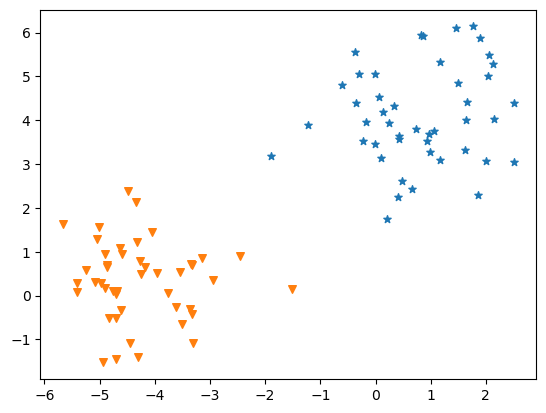

In [9]:
X, y = create_dataset1()
plot_dataset(X, y)

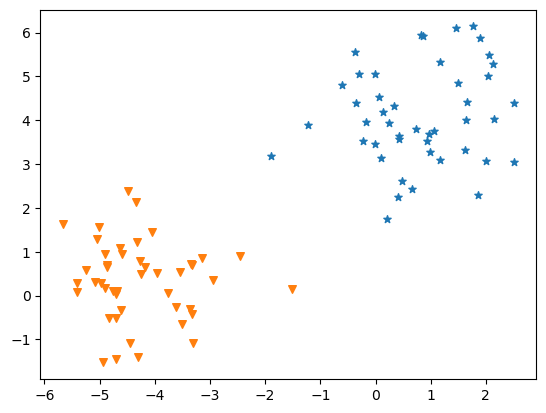

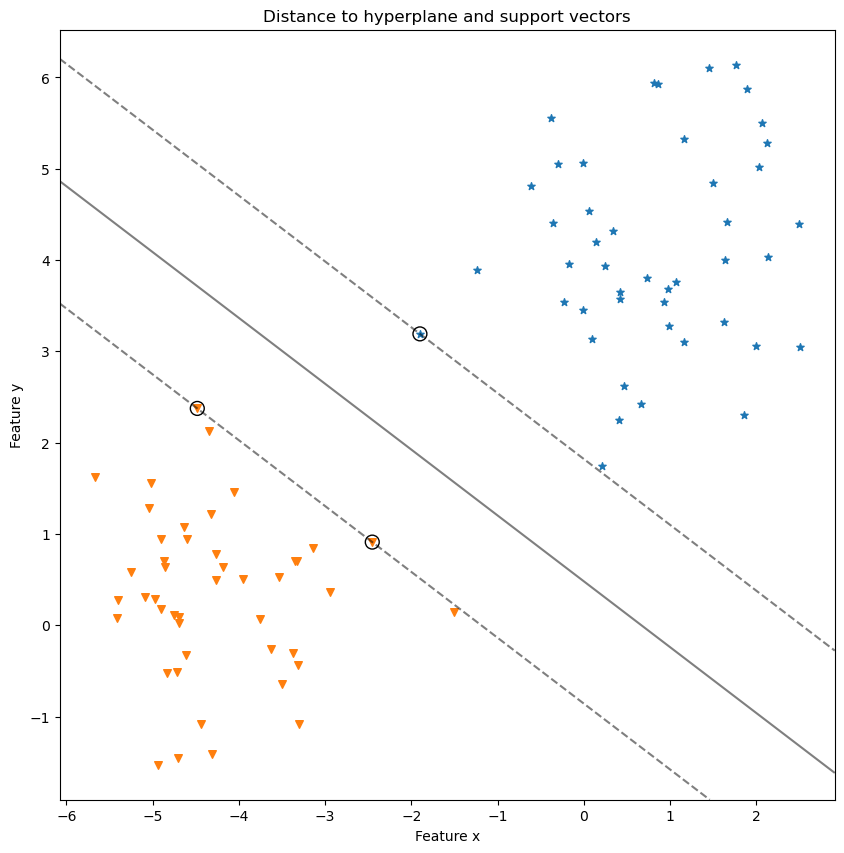

In [10]:
# use your SVM (fit method) from above with dataset 1 - write code here!

from sklearn.svm import SVC

X, y = create_dataset1()
plot_dataset(X, y)

clf.fit(X, y)

plot_svm_vectors(clf)


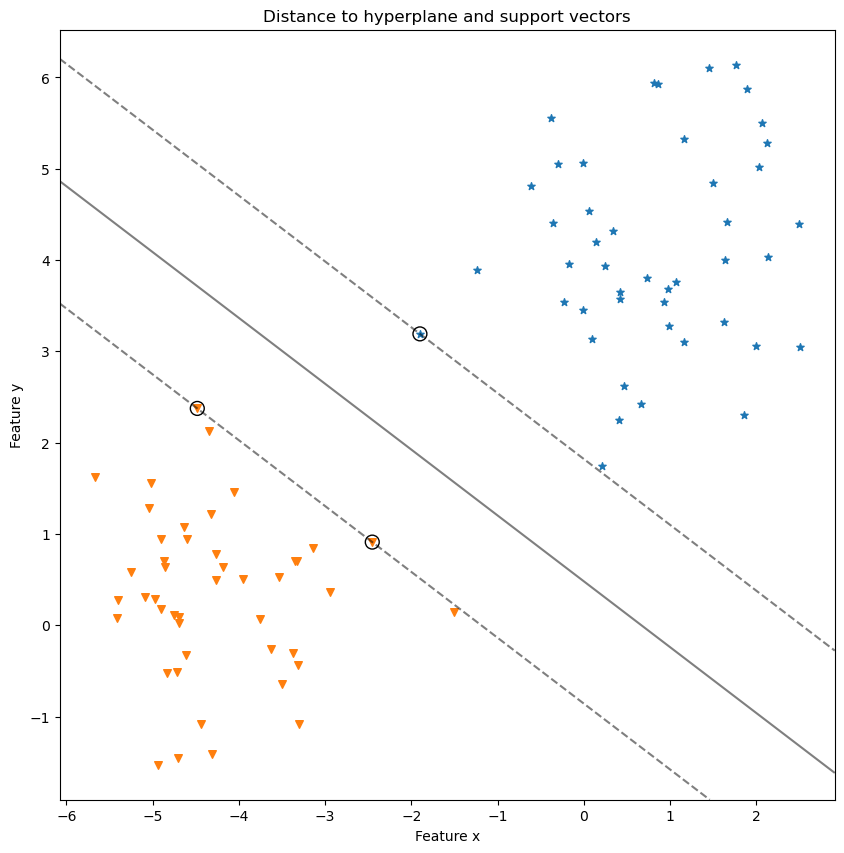

In [11]:
# we plot the decision boundaries of your svm
# what do you think how good is your model based on this visualization?

# Answer: For Dataset 1, the decision boundaries seem to clearly separate the two classes. The support vectors are correctly identified, and the margin between the classes is maximized. This indicates that the model is likely performing well for this dataset

plot_svm_vectors(clf)

#### 1.1.2) Dataset 2

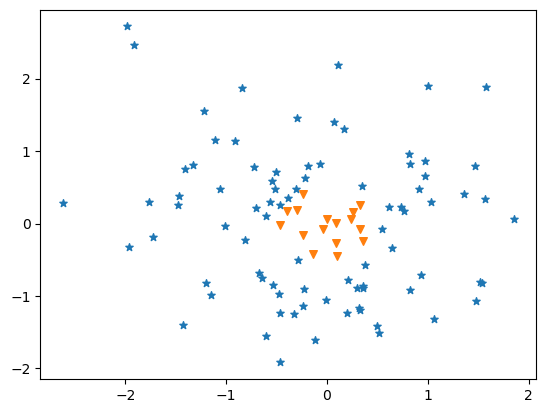

In [12]:
X, y = create_dataset2()
plot_dataset(X, y)

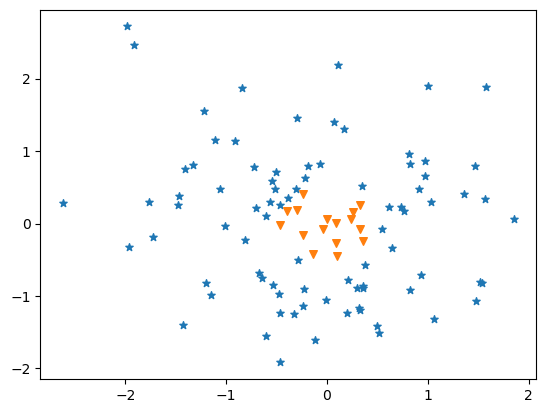

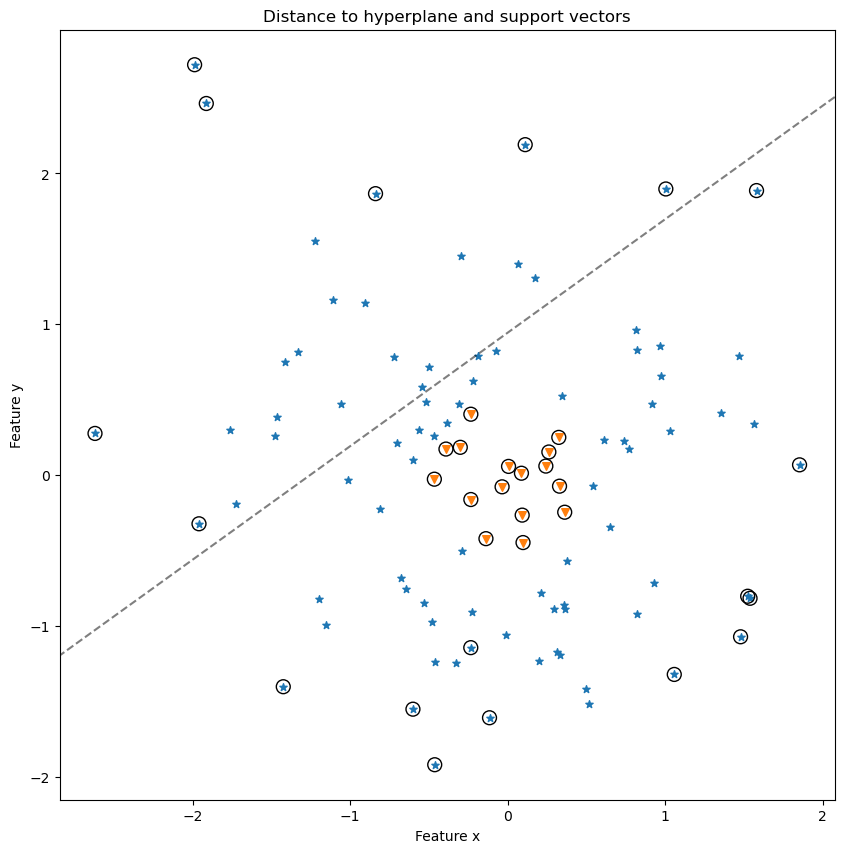

In [13]:
# use your SVM (fit method) from above with dataset 2 - write code here!

X, y = create_dataset2()
plot_dataset(X, y)

clf.fit(X, y)

plot_svm_vectors(clf)


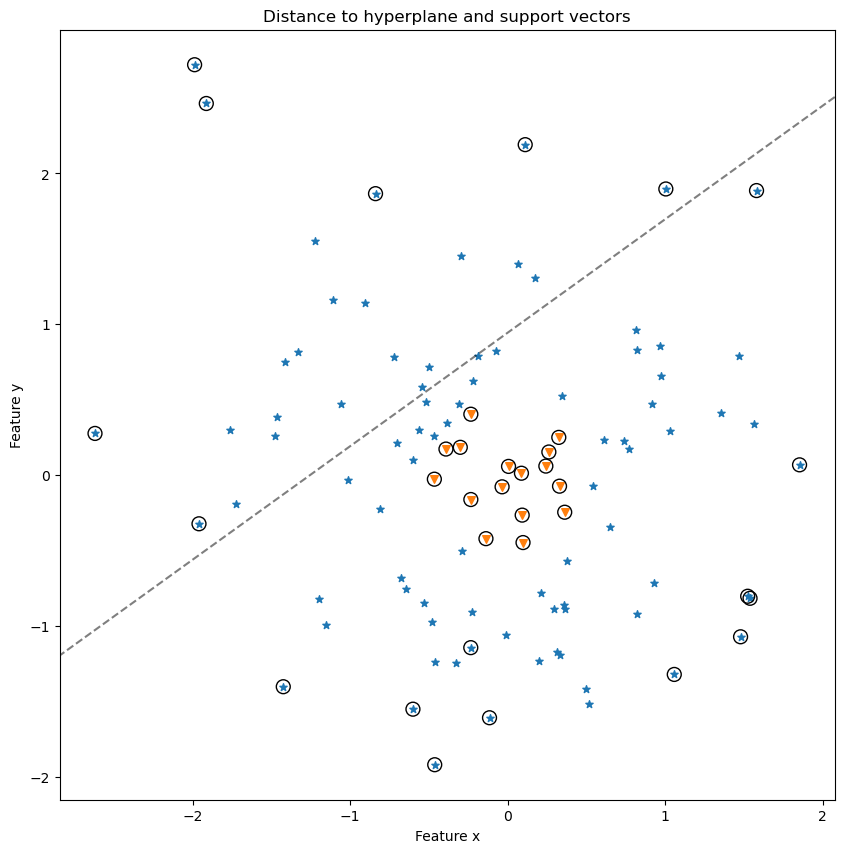

In [14]:
# we plot the decision boundaries of your svm
# what do you think how good is your model based on this visualization?

#For Dataset 2, the linear SVM does not perform well. The data points are arranged in a circular pattern, and a linear decision boundary fails to separate the classes effectively. The visualization shows that many data points are misclassified, indicating that the linear kernel is not suitable for this dataset. A non-linear kernel would likely perform better.

plot_svm_vectors(clf)

### 1.2) Use a polynomial kernel

In [15]:
# polynomial kernel (update code below)
# what is an appropriate value of C?

# Answer: For the polynomial kernel, an appropriate value of C depends on the balance between correctly classifying training examples and maintaining a smooth decision boundary. A smaller C value creates a smoother decision boundary but might misclassify some training examples. A larger C value aims to classify all training examples correctly but might lead to overfitting.
clf = svm.SVC(kernel='poly', degree=3, C=1.0)

#### 1.2.1) Dataset 1

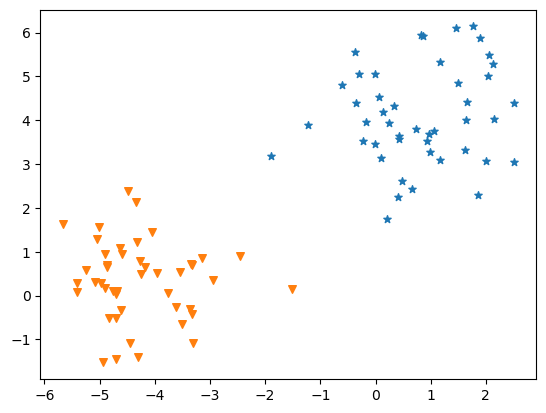

In [16]:
X, y = create_dataset1()
plot_dataset(X, y)

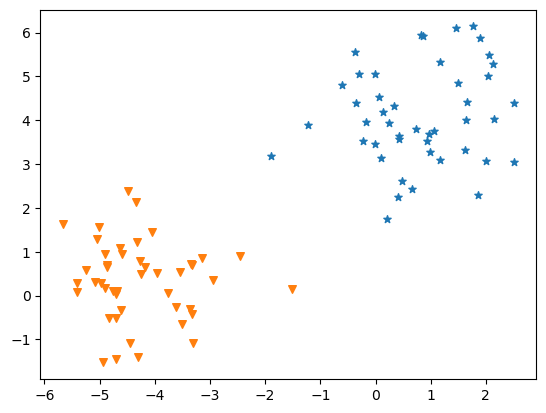

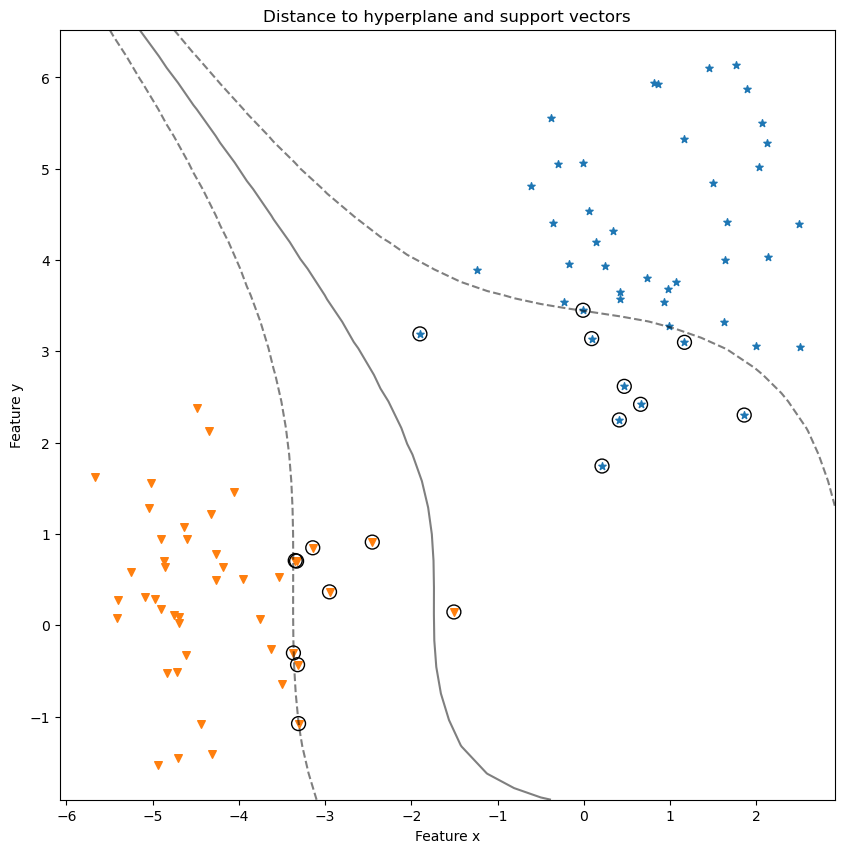

In [17]:
# use your SVM (fit method) from above with dataset 1 - write code here!

X, y = create_dataset1()
plot_dataset(X, y)

clf.fit(X, y)

plot_svm_vectors(clf)


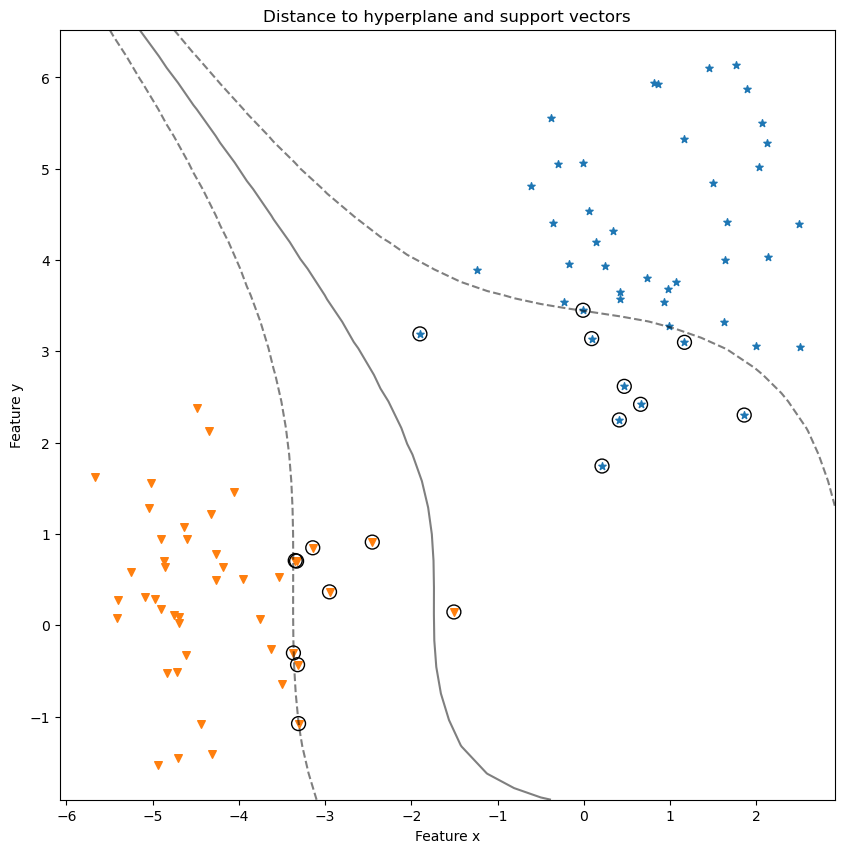

In [18]:
# we plot the decision boundaries of your svm
# what do you think how good is your model based on this visualization?

# Answer: For Dataset 1, the polynomial kernel SVM also performs well. The decision boundary effectively separates the two classes, similar to the linear SVM. The visualization shows a clear margin between the classes and the support vectors are correctly identified. This indicates that the polynomial kernel is suitable for this dataset, although it may not provide a significant improvement over the linear kernel for linearly separable data. The model's performance remains high.

plot_svm_vectors(clf)

#### 1.2.2) Dataset 2

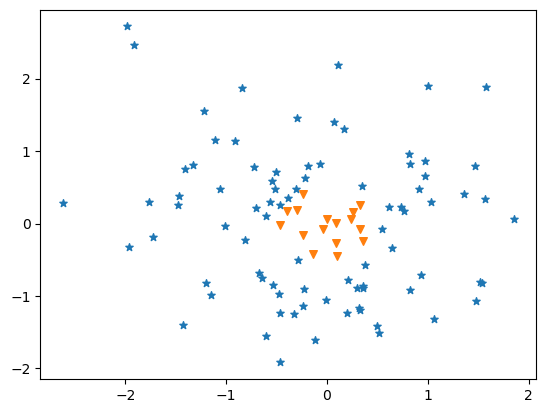

In [19]:
X, y = create_dataset2()
plot_dataset(X, y)

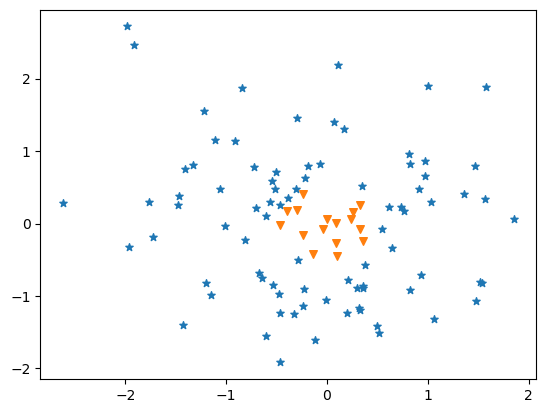

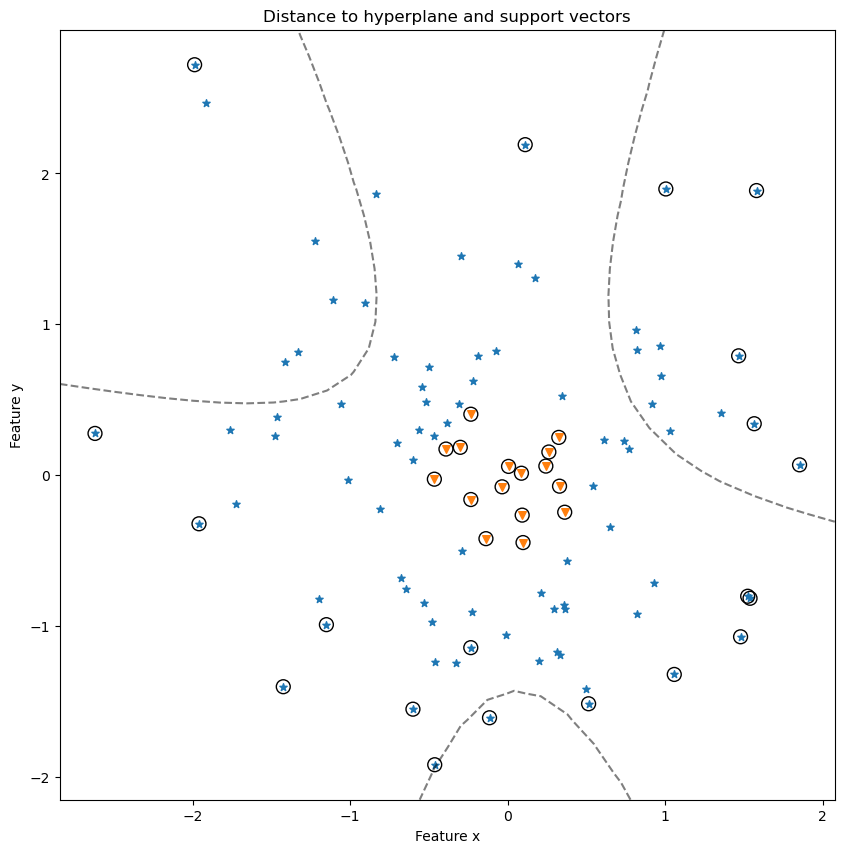

In [20]:
# use your SVM (fit method) from above with dataset 1 - write code here!

X, y = create_dataset2()
plot_dataset(X, y)

clf.fit(X, y)

plot_svm_vectors(clf)


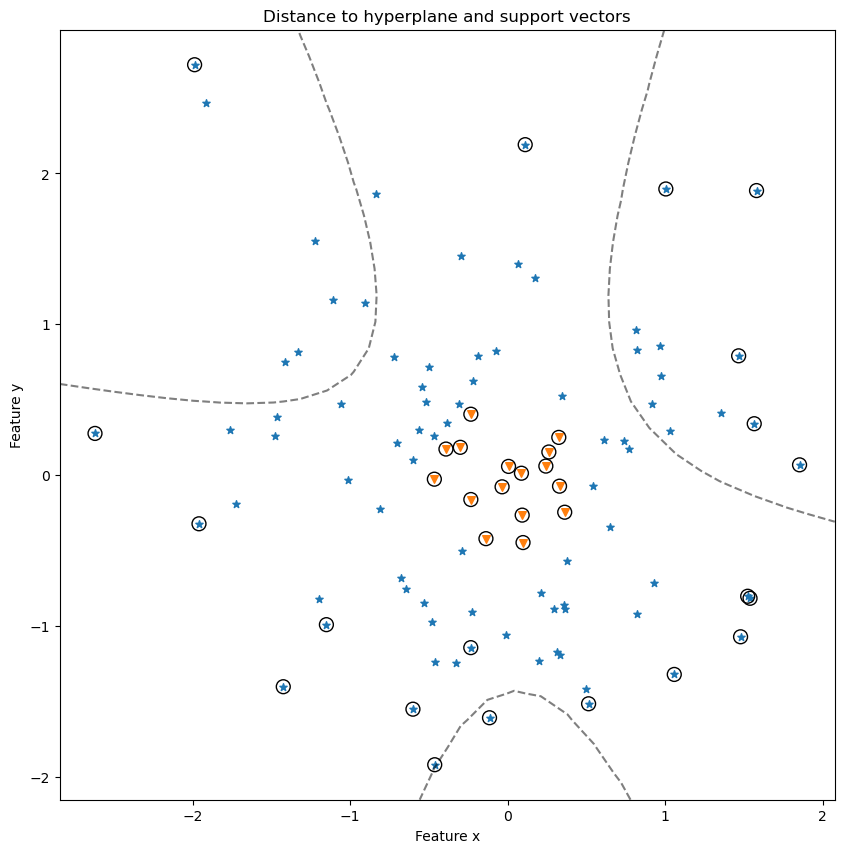

In [21]:
# we plot the decision boundaries of your svm
# what do you think how good is your model based on this visualization?

# Answer: For Dataset 2, the polynomial kernel SVM performs significantly better than the linear kernel. The decision boundary created by the polynomial kernel captures the circular pattern in the data more effectively. The visualization shows a much clearer separation between the two classes, with the decision boundary closely following the circular distribution of the data points. This indicates that the polynomial kernel is a more appropriate choice for this dataset, and the model's performance is likely to be much higher compared to using a linear kernel.

plot_svm_vectors(clf)

## 2) Random Forest Classification

In [22]:
def calculate_accuracy(y, y_pred):
    res = y == y_pred
    return np.mean(res)

In [23]:
# Use sklearn and its RandomForestClassifier implementation to fit the data into the model

# your RandomForestClassifier from sklearn - code here
# Start from a low number of estimators before you increase it step by step to see the prediction accuracy differences
clf = RandomForestClassifier(n_estimators=10)

### 2.1) Dataset 1

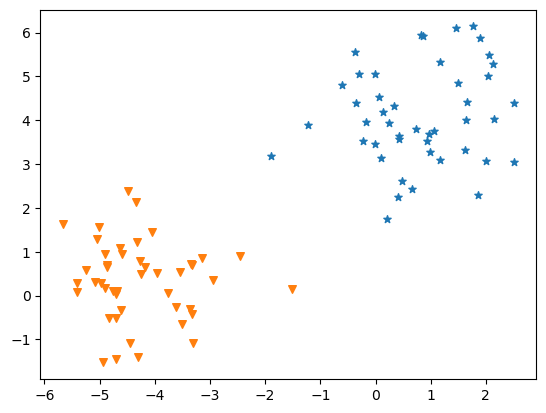

In [24]:
X, y = create_dataset1()
plot_dataset(X, y)

In [25]:
# We split the data into training and test data first
# dataset split into 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

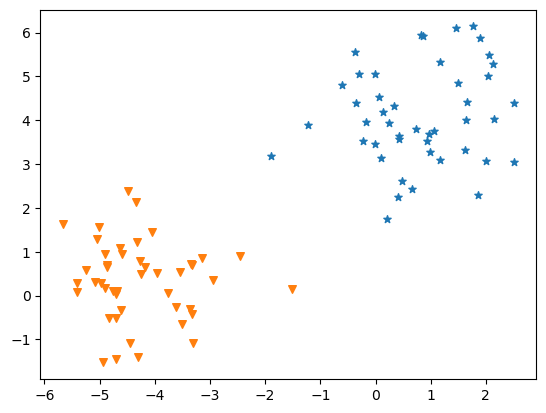

Accuracy on Dataset 1: 1.0


In [26]:
# use your classifier (fit method) with dataset 1 (train)

X, y = create_dataset1()
plot_dataset(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy on Dataset 1:", calculate_accuracy(y_test, y_pred))

In [27]:
# predict the values with the test dataset of dataset 1
# calculate the accuracy (use the method "calculate_accuracy" from above)

y_pred = clf.predict(X_test)
calculate_accuracy(y_test, y_pred)

1.0

### 2.2) Dataset 2

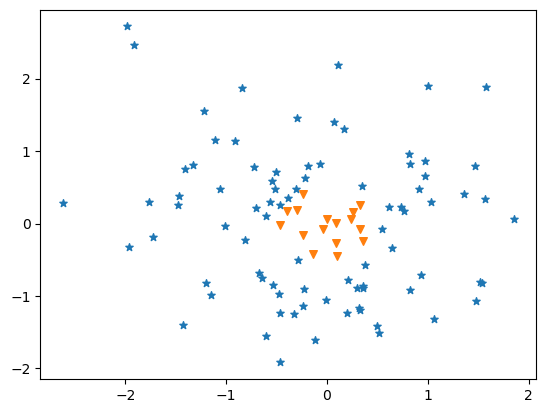

In [28]:
X, y = create_dataset2()
plot_dataset(X, y)

In [29]:
# We split the data into training and test data first
# dataset split into 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

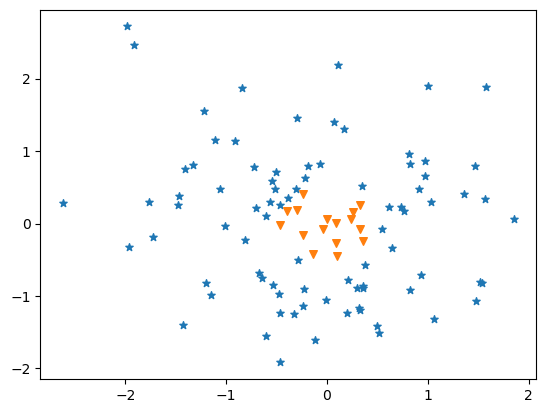

RandomForestClassifier(n_estimators=10)

In [30]:
# use your classifier (fit method) with dataset 1 (train)

X, y = create_dataset2()
plot_dataset(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

clf.fit(X_train, y_train)

In [31]:
# predict the values with the test dataset of dataset 1
# calculate the accuracy (use the method "calculate_accuracy" from above)
# your code here!

y_pred = clf.predict(X_test)
print("Accuracy on Dataset 2:", calculate_accuracy(y_test, y_pred))

Accuracy on Dataset 2: 0.95
